In [1]:
import re
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.svm import SVR
# Experimented with data from https://nepalindata.com/

In [2]:
def load_data(filename):
    # The first two sequence of integers must consist of dataset
    with open(filename) as fp:
        number_list = []        # [int(number) for line in fp for number in re.findall(r'\d+', line)]
        incr = 0
        for line in fp:
            text_list = line.split(',')
            for text in text_list:
                number = ''.join(list(filter(str.isdigit, text)))
                if len(number) > 0:
                    if (len(number)) != len(text):
                        incr += 1
                        break
                    number_list.append(int(number))
                if incr >= 2:
                    break
    data_count = len(number_list) // 2
    years = number_list[:data_count]
    measures = number_list[data_count:]
    return (years, measures)

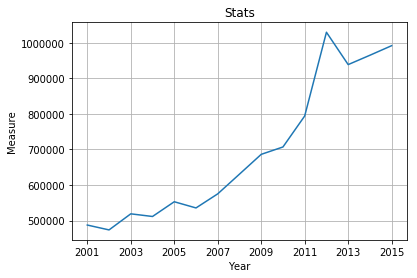

In [3]:
x, y = load_data('./data/fruits_production.csv')

plt.plot(x,y)
plt.xticks(x[::2])
plt.title('Stats')
plt.grid(True)

plt.xlabel("Year")
plt.ylabel("Measure")
plt.show()

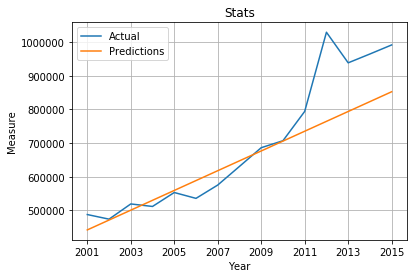

Prediction Error: 32684817127.84


In [4]:
x, y = load_data('./data/fruits_production.csv')
x_feats = [[feat] for feat in x]
train_count = int(0.75 * len(x_feats))

x_train, x_val, y_train, y_val = x_feats[:train_count], x_feats[train_count:], y[:train_count], y[train_count:]

model = linear_model.LinearRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_feats)

mse = sum([(y_true - y_pred) ** 2 for y_true, y_pred in zip(y_val, model.predict(x_val))]) / len(x_val) 

plt.plot(x, y, label = 'Actual')
plt.plot(x, predictions, label = 'Predictions')

plt.xticks(x[::2])
plt.title('Stats')
plt.grid(True)

plt.xlabel("Year")
plt.ylabel("Measure")
plt.legend(loc='upper left')
plt.show()
print("Prediction Error: {:.2f}".format(mse))

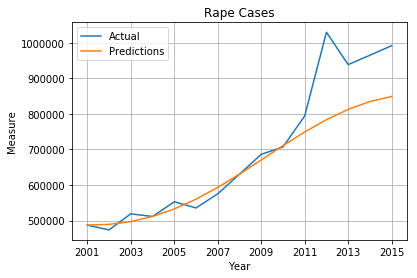

Prediction Error: 28426007201.72


In [5]:
model = SVR(kernel = 'rbf', C = 1e6, gamma = 0.01)
model.fit(x_train, y_train)
predictions = model.predict(x_feats)

mse = sum([(y_true - y_pred) ** 2 for y_true, y_pred in zip(y_val, model.predict(x_val))]) / len(x_val) 

plt.plot(x, y, label = 'Actual')
plt.plot(x, predictions, label = 'Predictions')

plt.xticks(x[::2])
plt.title('Stats')
plt.grid(True)

plt.xlabel("Year")
plt.ylabel("Measure")
plt.legend(loc='upper left')
plt.show()
print("Prediction Error: {:.2f}".format(mse))